## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(study_results ,mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
combined_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
len(combined_data["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse=combined_data.loc[combined_data.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
print(duplicate_mouse)

['g989']


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_df = combined_data[combined_data["Mouse ID"].isin(duplicate_mouse) == False]
clean_combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_combined_df["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tv_mean=clean_combined_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tv_median=clean_combined_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tv_variance=clean_combined_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tv_std=clean_combined_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tv_sem=clean_combined_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary dataframe.
tv_summary_stat = pd.DataFrame({"Tumor Volume Mean (mm3)": tv_mean,
                                "Tumor Volume Median (mm3)": tv_median,
                                "Tumor Volume Variance (mm3)": tv_variance,
                                "Tumor Volume STD (mm3)": tv_std,
                                "Tumor Volume SEM (mm3)": tv_sem})
# Formatting
tv_summary_stat = tv_summary_stat.round(2)

tv_summary_stat

,Tumor Volume Mean (mm3),Tumor Volume Median (mm3),Tumor Volume Variance (mm3),Tumor Volume STD (mm3),Tumor Volume SEM (mm3)
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
tv_summary_stat_2 = (clean_combined_df.groupby("Drug Regimen")).agg(["mean","median","var","std","sem"])["Tumor Volume (mm3)"]

# Formating
tv_summary_stat_2 = tv_summary_stat_2.round(2)
tv_summary_stat_2 = tv_summary_stat_2.rename(columns={"mean": "Tumor Volume Mean (mm3)","median":"Tumor Volume Median (mm3)",
                                                     "var":"Tumor Volume Variance (mm3)","std":"Tumor Volume STD (mm3)","sem":"Tumor Volume SEM (mm3)"})
tv_summary_stat_2


,Tumor Volume Mean (mm3),Tumor Volume Median (mm3),Tumor Volume Variance (mm3),Tumor Volume STD (mm3),Tumor Volume SEM (mm3)
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

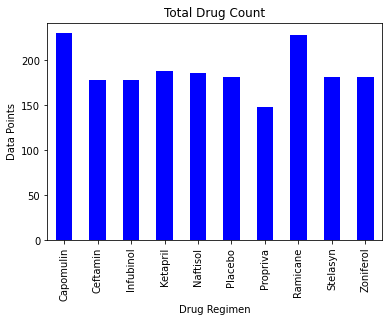

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# Calculate the total number of measurements taken on each drug regimen
regimen_data_points = clean_combined_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

# Bar plot using pandas
regimen_data_points.plot(kind="bar", facecolor='blue')

# Chart title
plt.title("Total Drug Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

plt.show()

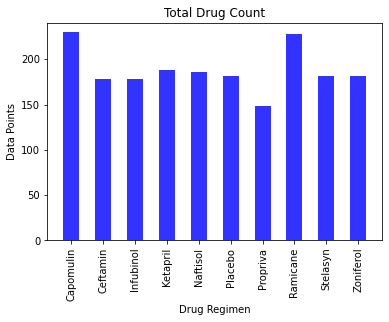

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# Create an array for the total number of measurements taken on each drug regimen
data_points_array = (clean_combined_df.groupby(["Drug Regimen"]).count()["Mouse ID"]).tolist()
data_points_array

# Bar plot using pyplot
x_axis = np.arange(len(regimen_data_points))
plt.bar(x_axis, data_points_array, color='b', alpha=0.8, align='center',  width= .5)

# Formating
tick_locations = [drug for drug in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(data_points_array)+10)

plt.title("Total Drug Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

plt.show()

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Calculate the distribution of female versus male mice
by_gender = clean_combined_df.groupby(["Mouse ID","Sex"])
by_gender_df = pd.DataFrame(by_gender.size())

# Create the dataframe with total count
mice_by_gender_df = pd.DataFrame(by_gender_df.groupby(["Sex"]).count())
mice_by_gender_df.columns = ["Total Count"]
# Calculate percentage
mice_by_gender_df["Gender Percentage"] = (100*(mice_by_gender_df["Total Count"]/mice_by_gender_df["Total Count"].sum())).round(2)

# Distribution of female versus male mice data frame
mice_by_gender_df

,Total Count,Gender Percentage
Sex,,
Female,123,49.6
Male,125,50.4


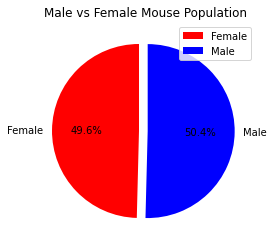

In [12]:
# Pie plot using pandas

plot = mice_by_gender_df.plot.pie(y='Total Count', colors=['red', 'blue'],explode = (0.1, 0), autopct="%1.1f%%", startangle=90)

# Formatting
plt.ylabel(" ")
plt.title("Male vs Female Mouse Population ")
plt.show()

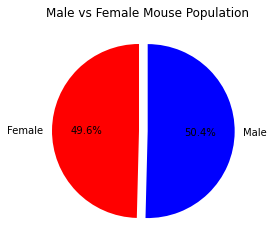

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create Labels for the sections of the pie
labels = mice_by_gender_df.index
distribution = mice_by_gender_df["Gender Percentage"]

# Pie plot using pyplot
plt.pie(distribution, labels=labels, colors = ['red', 'blue'],explode = (0.1, 0), autopct="%1.1f%%", startangle=90 )

#Formatting
plt.title("Male vs Female Mouse Population")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tp_df = pd.DataFrame(clean_combined_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'Max Timepoint'})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(clean_combined_df, max_tp_df, on='Mouse ID')

# For treatment regimens Capomulin, Ramicane, Infubinol, and Ceftamin
best_regimens_df = merged_df[merged_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
best_regimens_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Max Timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45
...,...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17,45
1876,m601,30,31.758275,1,Capomulin,Male,22,17,45
1877,m601,35,30.834357,1,Capomulin,Male,22,17,45
1878,m601,40,31.378045,1,Capomulin,Male,22,17,45


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tum_vol_values = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    temp_df = best_regimens_df.loc[best_regimens_df['Drug Regimen'] == treatment]
    # Create subset 
    final_tum_volume_df = temp_df.loc[temp_df['Timepoint'] == temp_df['Max Timepoint']]
    # Final volume values for each regimen
    values = final_tum_volume_df['Tumor Volume (mm3)']
    tum_vol_values.append(values)
    # Determine outliers using upper and lower bounds
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = (upperq-lowerq).round(2)
    print(f'IQR for {treatment}: {iqr}')
    # Find upper and lower bounds to help identify outliers for each regimen
    lower_bound = (lowerq - (1.5*iqr)).round(2)
    upper_bound = (upperq + (1.5*iqr)).round(2)
    print(f'Lower Bound for {treatment}: {lower_bound}')
    print(f'Upper Bound for {treatment}: {upper_bound}')
    # Quantitatively check for outliers
    outliers_count = (values.loc[(final_tum_volume_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                 (final_tum_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {treatment} outliers: {outliers_count}')

IQR for Capomulin: 7.78
Lower Bound for Capomulin: 20.71
Upper Bound for Capomulin: 51.83
Number of Capomulin outliers: 0
IQR for Ramicane: 9.1
Lower Bound for Ramicane: 17.91
Upper Bound for Ramicane: 54.31
Number of Ramicane outliers: 0
IQR for Infubinol: 11.48
Lower Bound for Infubinol: 36.83
Upper Bound for Infubinol: 82.75
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.58
Lower Bound for Ceftamin: 25.35
Upper Bound for Ceftamin: 87.67
Number of Ceftamin outliers: 0


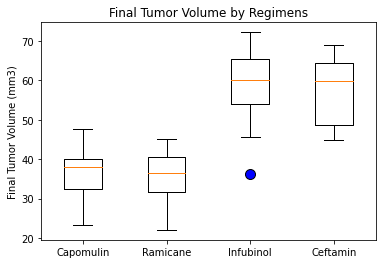

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tum_vol_values, flierprops=dict(marker='o', markerfacecolor='b', markersize=10))

# Add title and labels to boxplot
plt.title('Final Tumor Volume by Regimens')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1,2,3,4],treatments)

plt.show()

## Line and Scatter Plots

For Capomulin treated Mouse ID: t565


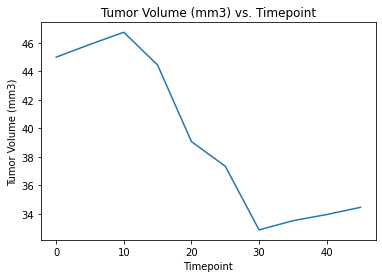

In [26]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_combined_df.loc[clean_combined_df['Drug Regimen'] == 'Capomulin']

random_mouse = random.choice(list(capomulin_df["Mouse ID"]))
print(f'For Capomulin treated Mouse ID: {random_mouse}')
mouse= clean_combined_df.loc[clean_combined_df['Mouse ID'] == random_mouse]


plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume (mm3) vs. Timepoint")
plt.show()

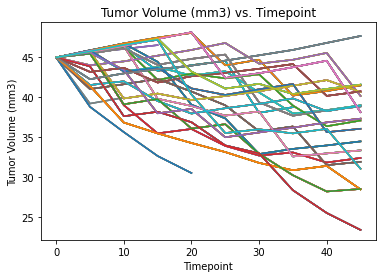

In [27]:
# BONUS: Generate a line plot of tumor volume vs. time point for "ALL" mouse treated with Capomulin
capomulin_df = clean_combined_df.loc[clean_combined_df['Drug Regimen'] == 'Capomulin']
mouses = capomulin_df['Mouse ID']
for mouse in mouses:
    df= capomulin_df.loc[capomulin_df['Mouse ID'] == mouse]


    plt.plot(df["Timepoint"], df["Tumor Volume (mm3)"])
    plt.xlabel("Timepoint")
    plt.ylabel("Tumor Volume (mm3)")
    plt.title("Tumor Volume (mm3) vs. Timepoint")
  

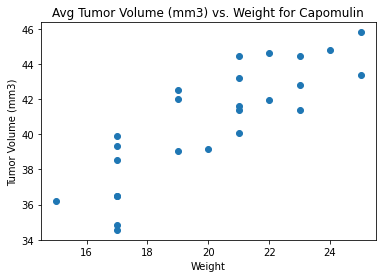

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_weight= clean_combined_df.loc[clean_combined_df['Drug Regimen'] == 'Capomulin']
capomulin_avg=capomulin_weight.groupby(["Mouse ID"]).mean()
x_values = capomulin_avg["Weight (g)"]
y_values = capomulin_avg["Tumor Volume (mm3)"]

plt.scatter(x_values,y_values )
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Avg Tumor Volume (mm3) vs. Weight for Capomulin")
plt.show()

## Correlation and Regression

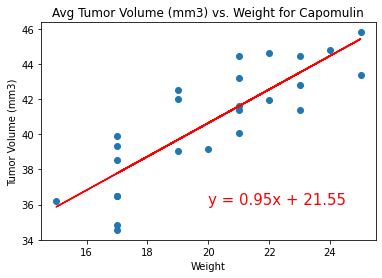

The r-squared is: 0.7088568047708717


In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Avg Tumor Volume (mm3) vs. Weight for Capomulin")
plt.show()
print(f"The r-squared is: {rvalue**2}")